## Banknote Authentication | Random Forest Classification

The [dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) instances were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

The goal is to classify given inputs to genuine or forged banknotes.

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

### Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data_banknote_authentication.csv')

In [8]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Variance_Wavelet,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness_Wavelet,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis_Wavelet,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Image_Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


### EDA

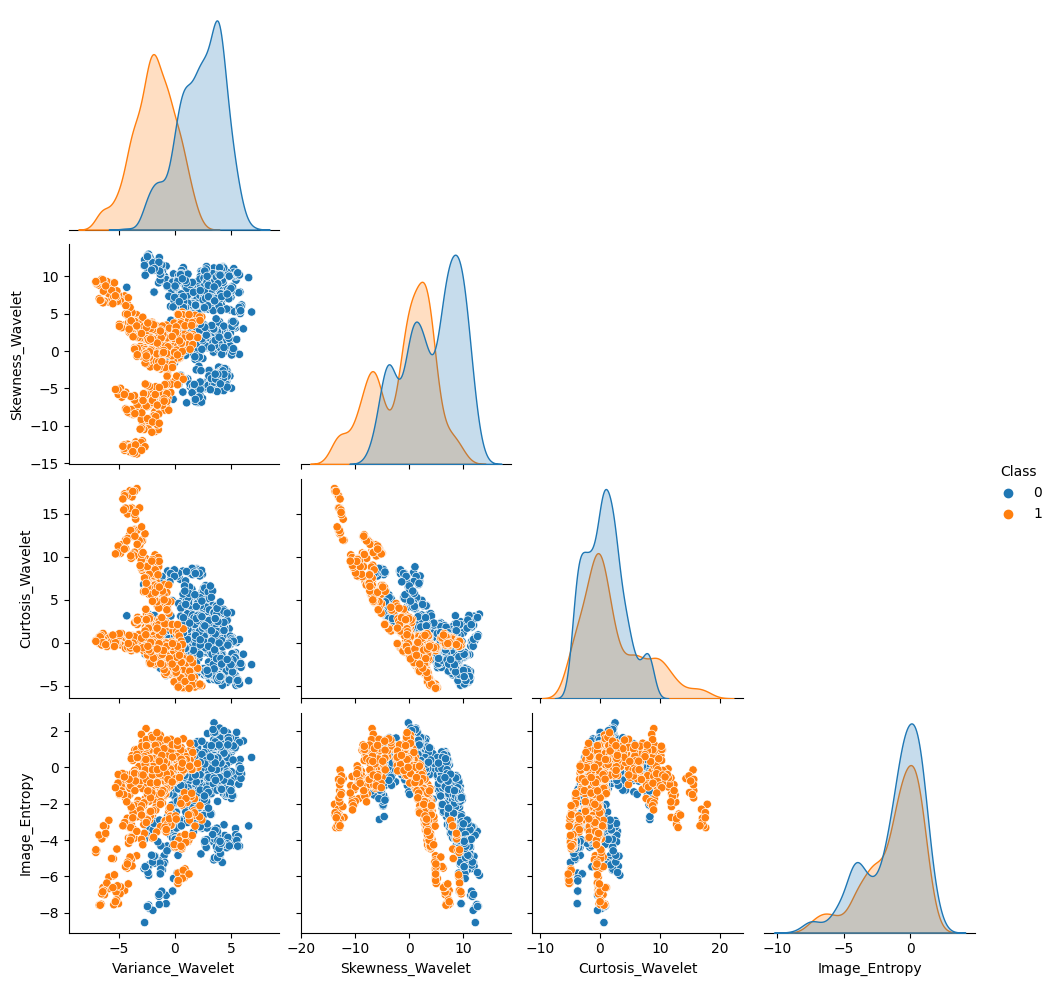

In [5]:
sns.pairplot(data=df, hue='Class', corner=True)

<AxesSubplot: >

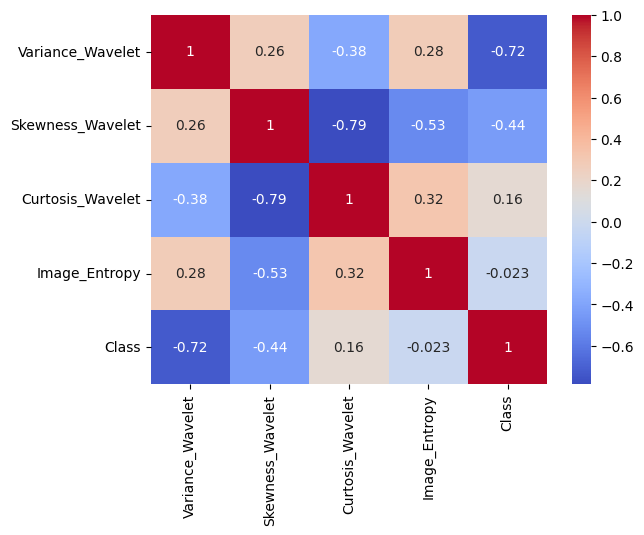

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Classification Using Random Forest Classifier

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# base model
base_model = RandomForestClassifier()

# parameter grid
param_grid = {'n_estimators':[84, 100, 128],
              'max_features':[2,3,4],
              'bootstrap':[True, False]}

# grid search for optimal hyper-parameters
model = GridSearchCV(base_model, param_grid)

# train
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [84, 100, 128]})

In [11]:
model.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=128)

In [18]:
model.best_estimator_.bootstrap

True

In [14]:
model.best_estimator_.feature_importances_

array([0.55530983, 0.23328373, 0.1548222 , 0.05658424])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       257
           1       0.99      0.99      0.99       196

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



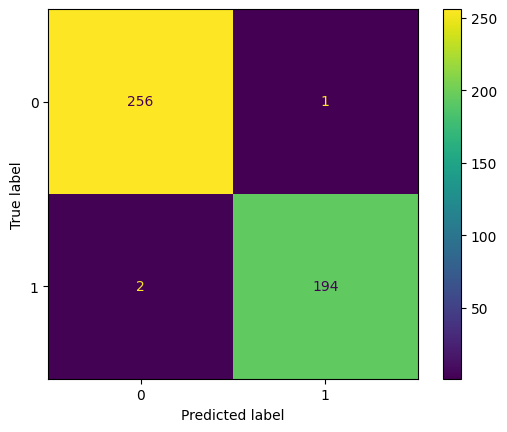

In [12]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# predict on test set
pred = model.predict(X_test)

# evaluate
print(classification_report(y_test, pred))
ConfusionMatrixDisplay.from_predictions(y_test, pred)

### error vs n_estimators (trees in Random Forest)

Plotting the graph betwenn classification erros and n_estimators used in order to observe how many estimators (trees) we need for our classification tasks.

In [19]:
from sklearn.metrics import accuracy_score
errors = []

for i in range(1, 128):
    model = RandomForestClassifier(n_estimators=i, max_features=2, bootstrap=True)
    model.fit(X_train, y_train)
    pred_ = model.predict(X_test)
    errors.append(1 - accuracy_score(y_test, pred_))

Text(0, 0.5, 'error value')

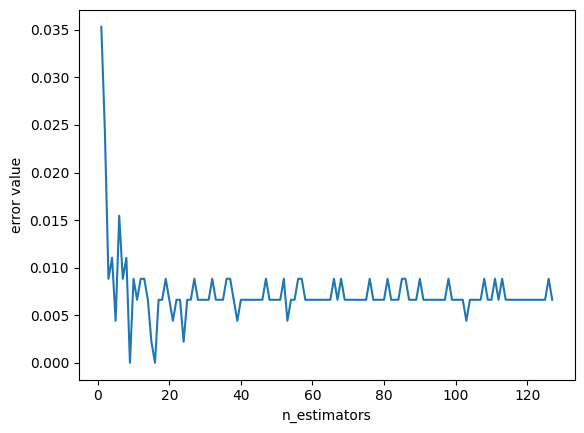

In [21]:
plt.plot(range(1, 128), errors)
plt.xlabel('n_estimators')
plt.ylabel('error value')